In [1]:
from skimage import segmentation
from skimage import morphology
from skimage import feature
from scipy import ndimage
from skimage import measure
from skimage import filters
from skimage import exposure
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(3272, 1883) 1.6230667651759988e-07 1.0


Text(0.5, 1.0, 'histogram of gray values')

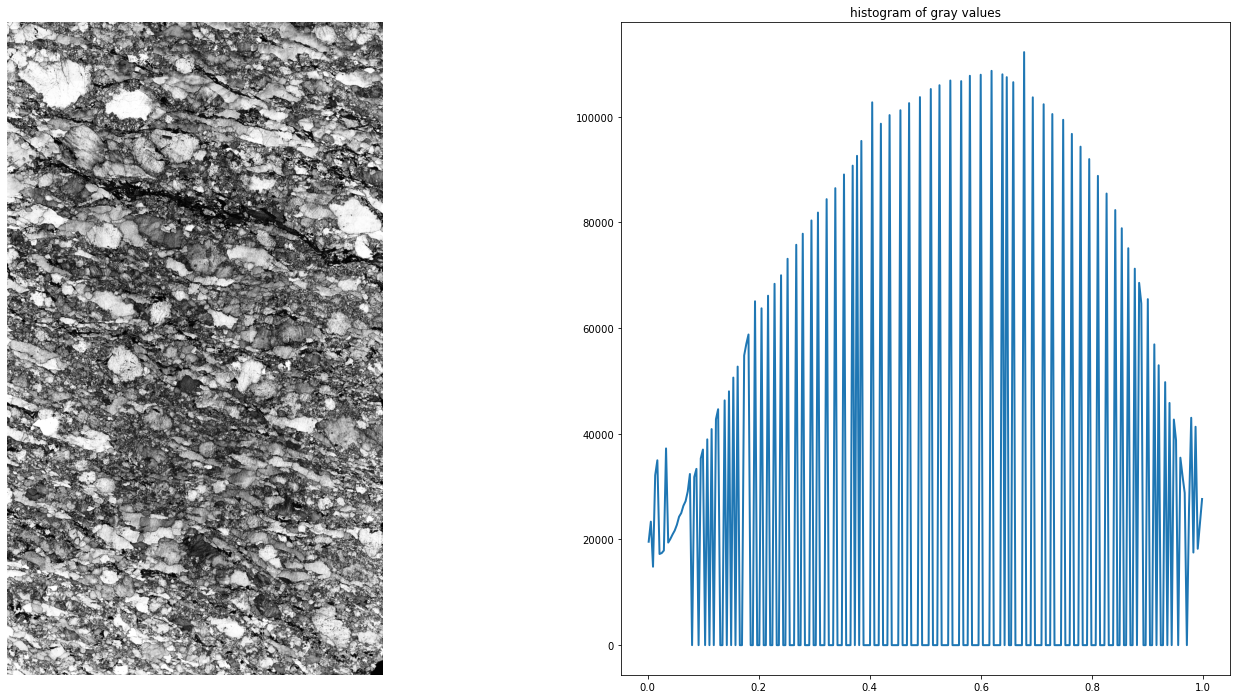

In [2]:
# import cropped band contrast image
band_contrast_raw = io.imread('../images/cropped_band_image.png', as_gray=True)

# equalize histogram of band contrast image
band_eq = exposure.equalize_hist(band_contrast_raw)
print(band_eq.shape, band_eq.min(), band_eq.max())

# display image and hist stats
hist, hist_centers = exposure.histogram(band_eq)

fig, axs = plt.subplots(1, 2, figsize=(24, 12))
axs[0].imshow(band_eq, cmap=plt.cm.gray)
axs[0].axis('off')
axs[1].plot(hist_centers, hist, lw=2)
axs[1].set_title('histogram of gray values')

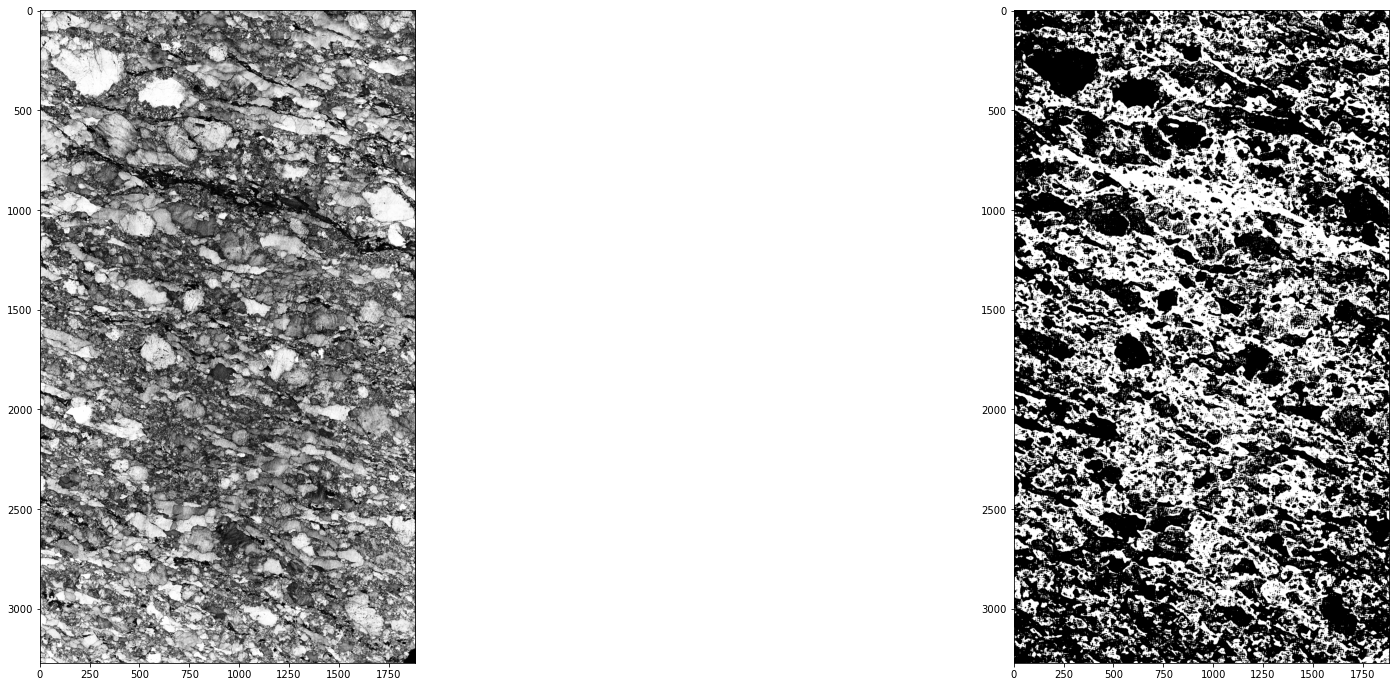

In [27]:
filtered1 = filters.gaussian(band_eq, sigma=(320 / (4.0 * 20)))
local_thresh1 = filters.threshold_local(band_eq, 13, method='median')
blobs1 = filtered1 > local_thresh1


# show filtered image and detected blobs
fig, axs = plt.subplots(1, 2, figsize=(32, 12))
axs = axs.ravel()
axs[0].imshow(band_eq, cmap='gray')
axs[1].imshow(blobs1, cmap='gray')
